In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/Ehsan/Desktop/DT - RF -SVM/train.csv')
df = pd.DataFrame(data)
df

##khondan dataset va toid dataframe

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df.info()

## vorody non nadarim

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
print(pd.unique(df['blue']))
print(pd.unique(df['dual_sim']))
print(pd.unique(df['four_g']))
print(pd.unique(df['three_g']))
print(pd.unique(df['touch_screen']))
print(pd.unique(df['wifi']))
print(pd.unique(df['price_range']))

## kelashaye sotonha 

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[1 2 3 0]


In [7]:
pd.set_option('max_columns', None)

## baraye neshan dadane hame sotonha 

In [8]:
df.corr()
## ram >> battery_power >>px_width >> px_heights

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:xlabel='pc'>

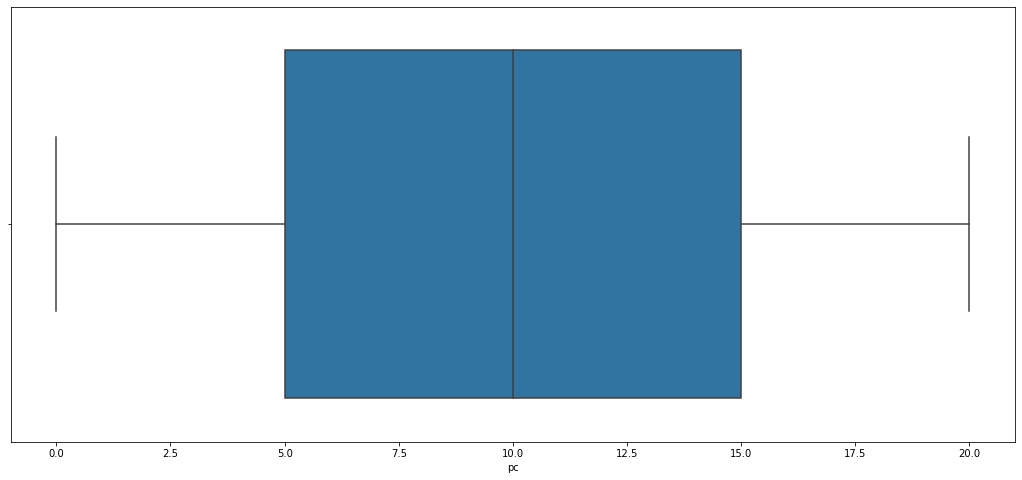

In [9]:
plt.figure(figsize=(18,8))
sns.boxplot(x='pc',data=df)

## noisi dar dataset peida nashod - az tarigh plot check kardam vali be dalil inke code tolany nashe hame plotha ro nayovordam

<AxesSubplot:xlabel='int_memory', ylabel='count'>

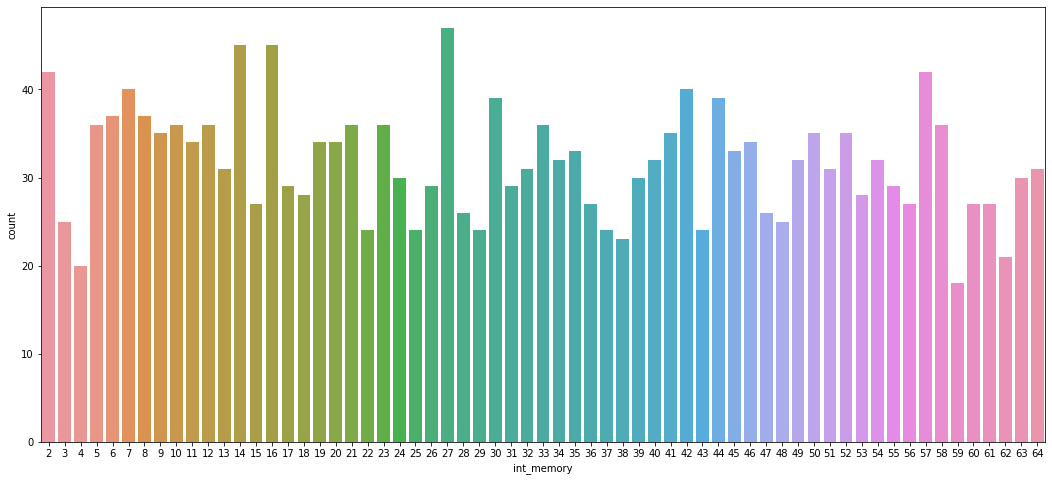

In [10]:
plt.figure(figsize=(18,8))
sns.countplot(x='int_memory',data=df)

In [64]:
## DecisionTree classification

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [76]:
x = df.drop('price_range' , axis=1)
y = df['price_range'].values.reshape(-1,1)

In [88]:
x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size = 0.3 , random_state = 0)

In [89]:
DT_clf = DecisionTreeClassifier(max_depth=20)
DT_clf.fit(x_train,y_train)

## ba chadbar check kardan depth 20 natije behtari midad 

DecisionTreeClassifier(max_depth=20)

In [90]:
y_pred = DT_clf.predict(x_test)
y_pred

array([3, 0, 2, 2, 3, 0, 1, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 1, 1, 0, 0,
       3, 1, 2, 1, 3, 1, 3, 1, 1, 1, 2, 0, 2, 3, 0, 1, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 2, 1, 1, 3, 0, 3, 0, 2, 3, 1, 0, 3, 3, 1, 2, 2, 1, 2,
       3, 2, 1, 2, 3, 2, 1, 0, 1, 3, 2, 1, 2, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 3, 3, 0, 0, 3, 3, 3, 0, 3, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3,
       3, 0, 0, 2, 3, 3, 0, 1, 1, 0, 1, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       2, 3, 3, 3, 3, 2, 0, 1, 1, 2, 2, 3, 0, 3, 1, 0, 2, 0, 1, 1, 1, 1,
       3, 1, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 2, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 3, 1, 3, 0, 2, 3, 1, 1, 0, 3, 3, 0, 1, 3,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 3, 2, 3, 2, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 0, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 1, 1, 2,
       3, 2, 2, 3, 1, 1, 1, 3, 3, 2, 2, 3, 3, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       3, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [91]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y,DT_clf.predict(x)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       500
           1       0.92      0.95      0.94       500
           2       0.93      0.92      0.93       500
           3       0.96      0.96      0.96       500

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [92]:
print("accuracy of DT is:" , metrics.accuracy_score(y_test,y_pred))

accuracy of DT is: 0.8283333333333334


In [82]:
data_test = pd.read_csv('C:/Users/Ehsan/Desktop/DT - RF -SVM/test.csv')
df_test = pd.DataFrame(data_test)

## import kardane dataset test

In [83]:
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [84]:
df_test.drop('id' , axis=1 ,inplace=True)

## hazfe soton id

In [85]:
p =np.zeros(1000)
df_test.insert(20 , 'price_range' , p)

## ezafe kardane sotone price range ba maghadir pishfarz 0

In [93]:
result = DT_clf.predict(df_test.drop('price_range' , axis=1))
result
## natayej roye dataset test ba estafede az DT

array([3, 3, 3, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 1, 1, 0, 3, 2, 0, 2,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 0, 3, 3, 3, 0, 2, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 1, 2, 3, 1, 3, 3, 0, 3, 0, 3, 1,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 1, 0, 3, 2, 1, 1, 0, 3, 2, 2, 2, 0, 2,
       1, 0, 2, 1, 2, 0, 3, 2, 1, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 0,
       2, 2, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 2, 0, 0, 0, 1, 1, 3, 2, 1, 0, 0, 0, 0, 0, 3, 1, 1, 2, 2,
       3, 3, 1, 2, 2, 3, 3, 2, 2, 1, 0, 0, 1, 2, 0, 3, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 0, 0, 1, 0, 3, 0, 1, 0, 2, 1, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 2, 0, 3, 2, 1, 3,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 3, 3,
       2, 2, 1, 3, 3, 2, 3, 2, 3, 1, 2, 0, 3, 3, 1,

In [112]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k = KFold(8)

print(cross_val_score(DT_clf , x ,y.ravel() , cv=k ,n_jobs=1))

## behbod mode DT be vasile cross validtion

[0.816 0.808 0.848 0.844 0.868 0.864 0.78  0.752]


In [116]:
df_op = df[df.index<1749] ## hazfe folde akhar

In [117]:
df_op

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,731,1,0.5,1,0,1,28,0.5,130,8,0,424,1032,1774,12,8,10,1,0,0,1
1745,926,1,0.8,0,6,1,59,0.8,161,7,14,84,793,256,18,7,2,1,0,1,0
1746,1261,0,0.5,0,3,1,52,0.3,86,2,9,605,1429,1365,9,3,16,1,0,1,1
1747,618,0,1.1,0,11,1,45,0.2,188,3,20,1175,1586,2339,19,2,10,1,1,0,2


In [119]:
x_op = df_op.drop('price_range' , axis=1)
y_op = df_op['price_range'].values.reshape(-1,1)

In [120]:
x_train_op , x_test_op , y_train_op ,y_test_op = train_test_split(x_op,y_op , test_size = 0.3 , random_state = 0)

In [121]:
DT_clf_op = DecisionTreeClassifier(max_depth=20)
DT_clf_op.fit(x_train_op , y_train_op)

DecisionTreeClassifier(max_depth=20)

In [122]:
y_pred_op = DT_clf_op.predict(x_test_op)

In [123]:
print(classification_report(y_op,DT_clf_op.predict(x_op)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       424
           1       0.93      0.94      0.93       440
           2       0.93      0.93      0.93       446
           3       0.97      0.96      0.96       439

    accuracy                           0.95      1749
   macro avg       0.95      0.95      0.95      1749
weighted avg       0.95      0.95      0.95      1749



In [124]:
print("accuracy of DT_optimized is:" , metrics.accuracy_score(y_test_op,y_pred_op))

## deghat kami behtar shod

accuracy of DT_optimized is: 0.8304761904761905


In [125]:
confusion_matrix(y_op,DT_clf_op.predict(x_op))

array([[412,  12,   0,   0],
       [ 15, 412,  13,   0],
       [  0,  18, 415,  13],
       [  0,   0,  18, 421]], dtype=int64)

In [107]:
df2 = df.append(df_test)

## be dast avardane maghadir predict ba ravash dige : ezafe kardane maghadir datatset test be train 

In [108]:
df2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2.0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2.0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0,0.0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1,0.0
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0,0.0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0,0.0


In [23]:
df2.drop('id' , axis=1 , inplace=True)

In [24]:
df2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2.0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2.0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0,NaN
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1,NaN
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0,NaN
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0,NaN


In [41]:
x_train2 = df2.drop('price_range' , axis=1)[:2000]
y_train2 = df2['price_range'][:2000].values.reshape(-1,1)

In [42]:
x_test2 = df2.drop('price_range' , axis=1)[2000:]

In [43]:
x_test2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [44]:
DT_clf.fit(x_train2 , y_train2)

DecisionTreeClassifier(max_depth=20)

In [50]:
y_pred2 = DT_clf.predict(x_test2)
y_pred2

array([3., 3., 2., 3., 1., 3., 3., 1., 3., 0., 3., 3., 0., 0., 2., 1., 2.,
       0., 3., 2., 0., 3., 1., 1., 3., 0., 2., 0., 3., 0., 2., 0., 3., 0.,
       0., 1., 3., 1., 2., 1., 1., 2., 0., 0., 0., 1., 0., 3., 1., 2., 1.,
       0., 3., 0., 3., 1., 3., 1., 0., 3., 3., 2., 0., 1., 1., 1., 1., 3.,
       1., 2., 1., 2., 2., 3., 3., 0., 2., 1., 2., 3., 1., 3., 3., 0., 3.,
       0., 3., 1., 2., 0., 1., 2., 2., 1., 2., 1., 0., 2., 0., 3., 1., 0.,
       0., 3., 0., 2., 0., 1., 2., 3., 3., 3., 1., 3., 2., 3., 3., 2., 3.,
       0., 0., 3., 2., 1., 2., 0., 3., 3., 3., 2., 0., 2., 1., 1., 3., 0.,
       1., 0., 3., 2., 1., 3., 1., 3., 2., 3., 3., 2., 2., 3., 2., 3., 1.,
       0., 3., 2., 3., 3., 3., 3., 3., 2., 3., 2., 3., 3., 0., 0., 3., 0.,
       0., 0., 2., 0., 0., 2., 1., 0., 1., 2., 0., 0., 0., 1., 2., 2., 2.,
       1., 0., 0., 0., 1., 0., 3., 1., 0., 2., 2., 2., 3., 1., 1., 3., 3.,
       3., 2., 2., 0., 0., 0., 1., 2., 0., 2., 3., 3., 1., 2., 0., 3., 2.,
       2., 3., 1., 0., 1.

In [61]:
comparison = y_pred2 == result
equal_arrays = comparison.all()
print(equal_arrays)

## hamantor ke moshakhas shod to arraye predict shode barabar bodan 

True


In [24]:
### RandomForest classification

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
x_RF = df.drop('price_range' , axis=1)
y_RF = df['price_range'].values.reshape(-1,1)

In [152]:
x_train_RF , x_test_RF , y_train_RF ,y_test_RF = train_test_split(x_RF,y_RF , test_size = 0.25 , random_state = 0)

In [153]:
RF_clf = RandomForestClassifier(max_depth = 20)
RF_clf.fit(x_train_RF , y_train_RF)

## max deph ra haman 20 dar nazar migirim

<ipython-input-153-9494ecdf6cf3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_clf.fit(x_train_RF , y_train_RF)


RandomForestClassifier(max_depth=20)

In [154]:
y_pred_RF = RF_clf.predict(x_test_RF)
y_pred_RF

array([3, 0, 2, 1, 3, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 3, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 2, 1, 3, 3, 3, 0, 0, 0, 2, 0,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 2, 2, 1, 3, 1, 2, 3, 2, 3,
       3, 0, 0, 1, 2, 3, 0, 1, 1, 0, 0, 3, 1, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 1, 0, 1, 1, 2, 2, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 0,
       1, 2, 3, 0, 2, 1, 0, 1, 3, 1, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 3,
       2, 0, 3, 3, 2, 1, 1, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 1, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [157]:
print(classification_report(y_RF , RF_clf.predict(x_RF)))

## natayej model RF

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       500
           1       0.96      0.96      0.96       500
           2       0.96      0.94      0.95       500
           3       0.98      0.98      0.98       500

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [158]:
print("accuracy of RF is:" , metrics.accuracy_score(y_test_RF,y_pred_RF))

## deghate modele RF

accuracy of RF is: 0.874


In [159]:
confusion_matrix(y_RF,RF_clf.predict(x_RF))

array([[498,   2,   0,   0],
       [  8, 481,  11,   0],
       [  0,  19, 469,  12],
       [  0,   0,  11, 489]], dtype=int64)

In [160]:
RF_clf.predict(df_test.drop('price_range' , axis=1))

## natayej RF roye dataset test

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 1, 1, 3, 2, 0, 3,
       1, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 2, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       1, 3, 1, 1, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 1, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 0, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 0, 3, 1, 0, 2, 1,
       2, 3, 1, 2, 3, 3, 3, 1, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 0, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 2, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 1, 0, 2, 3, 1,

In [133]:
##optimazation of RF

In [161]:
k = KFold(7)

print(cross_val_score(RF_clf , x ,y.ravel() , cv=k ,n_jobs=1))

[0.89160839 0.87062937 0.86013986 0.90909091 0.87412587 0.85614035
 0.87368421]


In [ ]:
############################################################################

In [31]:
## SVM classification

In [174]:
x_train_SVM , x_test_SVM , y_train_SVM ,y_test_SVM = train_test_split(x,y , test_size = 0.22 , random_state = 0)

C:\Users\Ehsan\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ehsan\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ehsan\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ehsan\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

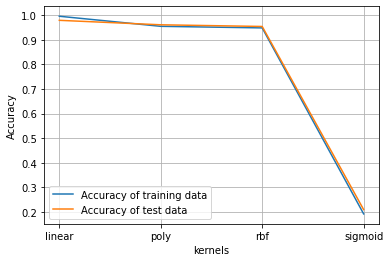

In [175]:
from sklearn.svm import SVC

train_acc = []
test_acc= []

kernels = ['linear', 'poly', 'rbf' ,'sigmoid', ]

for i in kernels:
    svm = SVC(kernel = i)
    svm.fit(x_train,y_train)
    train_acc.append(svm.score(x_train_SVM,y_train_SVM))
    test_acc.append(svm.score(x_test_SVM,y_test_SVM))

plt.plot(kernels,train_acc,label='Accuracy of training data')
plt.plot(kernels,test_acc,label='Accuracy of test data')
plt.xlabel('kernels')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

## baraye inke bebinim kodam kernel deghat behtari darad

## deghat kernel linear behtar az baghye bod

In [176]:
from sklearn.svm import SVC


SVM_clf = SVC(kernel='linear')
SVM_clf.fit(x_train_SVM,y_train_SVM)

C:\Users\Ehsan\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [177]:
y_pred_SVM = SVM_clf.predict(x_test_SVM)

In [178]:

print("accuracy of SVM is:" , metrics.accuracy_score(y_test_SVM,y_pred_SVM))

##deghat modele SVM ba kernel khati

accuracy of SVM is: 0.9795454545454545


In [179]:
print(classification_report(y,SVM_clf.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       0.99      0.99      0.99       500
           2       0.98      0.99      0.98       500
           3       1.00      0.98      0.99       500

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [181]:
confusion_matrix(y,SVM_clf.predict(x))

array([[499,   1,   0,   0],
       [  0, 496,   4,   0],
       [  0,   4, 495,   1],
       [  0,   0,   8, 492]], dtype=int64)

In [183]:
## talash baraye behbod svm be vasile cross validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k = KFold(7)

print(cross_val_score(SVM_clf , x ,y.ravel() , cv=k ,n_jobs=1))

[0.97202797 0.97902098 0.97202797 0.97202797 0.97202797 0.97192982
 0.9754386 ]


In [184]:
SVM_clf.predict(df_test.drop('price_range' , axis=1))

## natayeje SVM roye dataset test

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 2, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 1, 2, 2, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 1, 3, 0, 1, 2, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,